# 01_segmentation_train.ipynb

This file performs the model training process of our Pix2Pix-based lung segmentation system.



### Part 1: Define directories, import required libraries and setup sesion

In [1]:
# Change working directory to the root folder
import os, sys
if os.path.split(os.getcwd())[-1] != 'SmartDetect_segmentation':
    %cd ..
    sys.path.append("src")
    
    if os.path.split(os.getcwd())[-1] != 'SmartDetect_segmentation':
        raise UserError("Something went wrong in the directory reassignment!")

/home/sjors/Documents/TUe/MSc/Q3/8FM30/Project/SmartDetect_segmentation


In [2]:
# Perform required imports
import numpy as np
import matplotlib.pyplot as plt
from preprocessing import preprocessing
from dataset import generate_dataset
from model import define_discriminator, define_generator, define_gan
from training import * # TODO: Still gotta implement this!
from util.general import *
from util.inspection import *
from util.tf_session import *

# Setup GPU tensorflow session
n_gpus = setup_tf_gpu_session()

In [3]:
# Define some basic directories to use in the rest of this program
dataDir = os.path.join("data", "preprocessed")
modelDir = "model"
notebookDir = "notebook"

### Part 2: Perform data preprocessing
Please note that since this part may take quite a long time, it is skipped on default if the software detects preprocessed data already.

In [4]:
# Preprocessing the data. 
# To rerun the preprocessing, change 'rerun' to True

preprocessing(rerun=False)

--- Performing data preprocessing --- 
Extracting data from:	/home/sjors/Documents/TUe/MSc/Q3/8FM30/Project/SmartDetect_segmentation/data/raw
Outputting data to:	/home/sjors/Documents/TUe/MSc/Q3/8FM30/Project/SmartDetect_segmentation/data/preprocessed

Extracting data from subset 'CXR_ChinaSet' (1/3)... 
(found 566 images)
 |##################################################| 100.0% 

Result: WARNING (Missed 96 mask files)

Extracting data from subset 'CXR_Manual  ' (2/3)... 
(found 188 images)
 |##################################################| 100.0% 

Result: OK

Extracting data from subset 'CXR_Mntg    ' (3/3)... 
(found 138 images)
 |##################################################| 100.0% 

Result: OK


### Part 3: Dataset generation
The data is split into a training and test set per default.
Validation is performed with the training set based on a later split.

In [5]:
dataset_train = generate_dataset(dataDir, split_dataset=True, train_or_test='train')
dataset_test = generate_dataset(dataDir, split_dataset=True, train_or_test='test')


--- Performing data extraction (train) ---

Extracting data from /home/sjors/Documents/TUe/MSc/Q3/8FM30/Project/SmartDetect_segmentation/data/preprocessed
 |##################################################| 100.0% 
Completed. Dataset consists of 714 images and is 0.75 GB

--- Performing data extraction (test) ---

Extracting data from /home/sjors/Documents/TUe/MSc/Q3/8FM30/Project/SmartDetect_segmentation/data/preprocessed
 |##################################################| 100.0% 
Completed. Dataset consists of 178 images and is 0.19 GB


##### Visual data inspection
Here, we will also briefly inspect the data we'll be training the model with.

--- Performing data inspection for dataset 'train' ---

Amount of subjects:	714
Image size:		256, 256


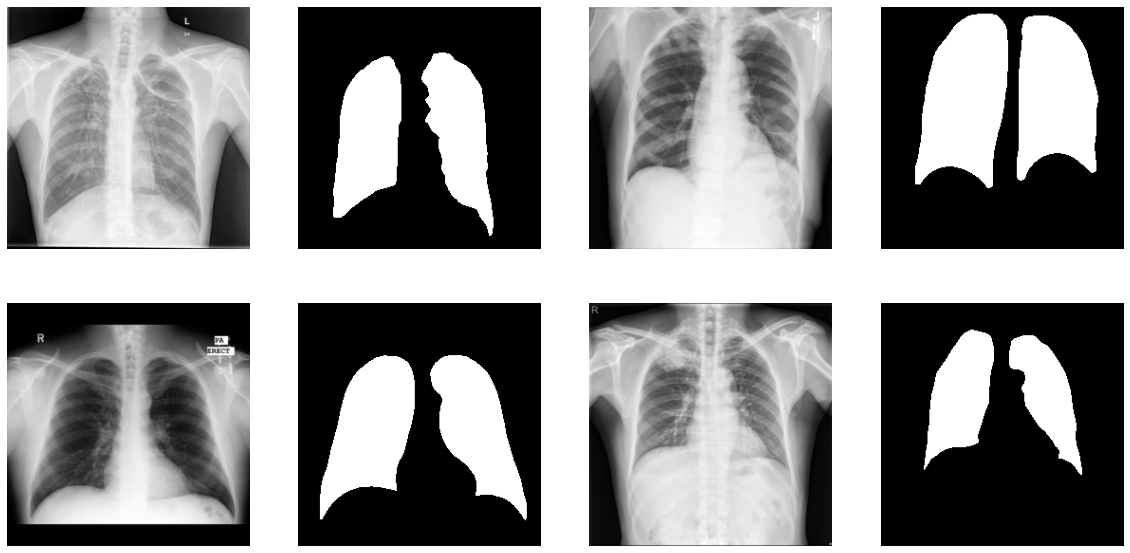



--- Performing data inspection for dataset 'test' ---

Amount of subjects:	178
Image size:		256, 256


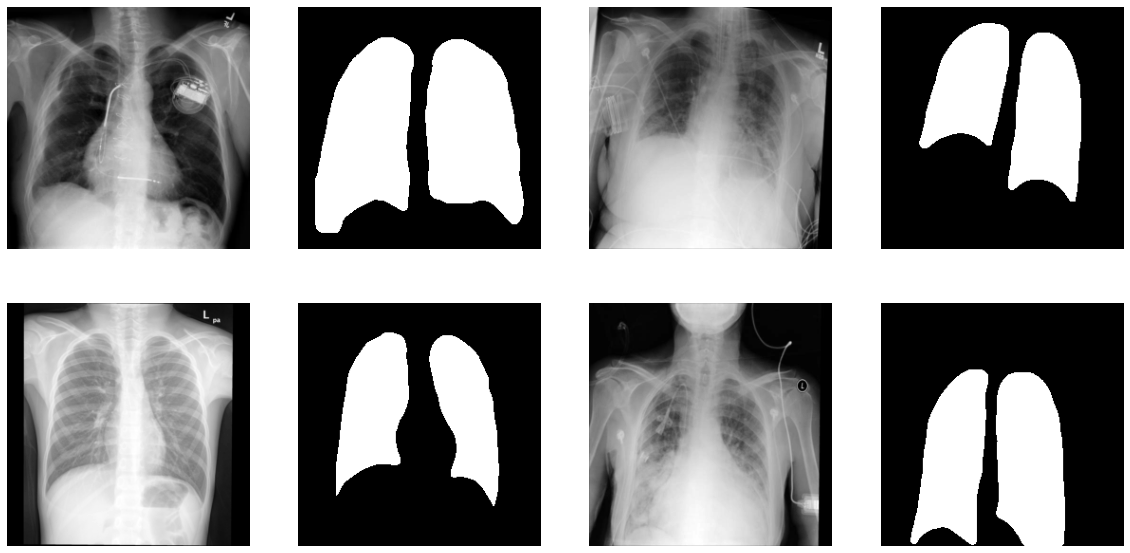

In [6]:
_, image_shape = inspect_dataset(dataset_train, 'train')
_, _ = inspect_dataset(dataset_test, 'test')

### Part 4: Model definition
Here, we will define the GAN model we'll be using for the segmentation purposes.
It is derived from the Pix2Pix model.

In [7]:
image_shape = (image_shape[0], image_shape[1], 1)

g_model = define_generator(image_shape)
d_model = define_discriminator(image_shape)
gan_model = define_gan(g_model, d_model, image_shape)

### Part 5: Training
Here, the actual training process is performed. 
We may pass some hyperparameters in the 'train' function.

In [8]:
# TODO: Implement actual training

### Part 6: Monitoring
The training process is monitored via TensorBoard.
The results will be displayed here after training is completed. Note, however, that we may also monitor the process at training time by opening tensorboard manually:

`tensorboard --logdir logs`

In [9]:
# TODO: Implement tensorboard display